In [1]:
%load_ext autoreload

In [3]:
%autoreload 2

import logging

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

logging.basicConfig(level=logging.INFO)
logging.getLogger().setLevel(logging.INFO)

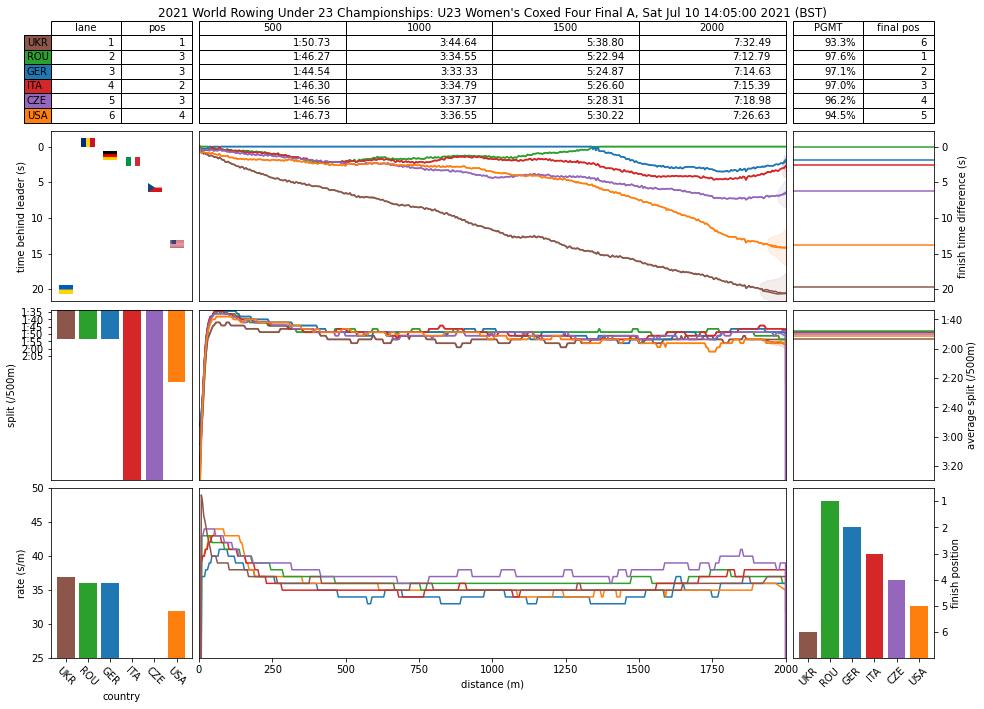

In [4]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))
dash.live_notebook_dashboard()

In [ ]:
comp_pgmts = api.get_competition_pgmts()
group_boat_pgmts = comp_pgmts.groupby('Boat')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.step(range(pgmt.size), pgmt.values, label=boat)
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();

In [ ]:
plt.step?